# DNA sequences and probable peptides

Question from Susan:

If you have a random nucleotide sequence (NNK) x 10, with N being A, G, T, or C and K being a G or a T, how likely is it that:
- I will get at least one cysteine encoded?
- I will get only one cysteine encoded?
- I will get more than one cysteine encoded?
- I will get no cysteine encoded?


## Will's answer . . . 

All these types of questions depend on the probability of a single NNK, codon being a Cystine?  So, I'll talk about how to compute that. We start by counting the number of possible three nucleotide sequences.  Four in the first slot, four in the second slot and 2 in the third:
\begin{align}
N_{\textrm{codons}} &= 4 \times 4 \times 2\\
&= 32. 
\end{align}
This tells us that the probability of any particular codon is $p=1/32$.  Only one of the cysteine codons fits the NNK form so $p=1/32$.    


## Getting no cysteins

The probability that we get no cysteines is pretty easy to compute, so I'll start there.  The probability that any codon is NOT cystein is $1-p = 31/32$.  To get none in a sequence of 10 codons we need to multiply $(1-p)\times (1-p) \times ... \times (1-p)$ ten times.  So, lets do that in the code below. 

## Getting one or more

This is a complimentary case to the probability is, 
$$
P_{\textrm{one or more}} = 1 - P_{\textrm{zero}}
$$



In [1]:

# The answer to the last question
p = 1.0 / 32.0
P_zero = (1.0 - p)**10



In [2]:
# The answer to the first question 
P_one_or_more = 1.0 - P_zero


## Getting exactly one cysteine

This is slighly more difficult, since there is more than one way to get a single cysteine.  We need to add the probabilities or each of the ten ways.

The probability of any one particular sequence with one cysteine computed by the multiplication principal for independent events: $p\,(1-p)^{9}$.  And, there are ten different equally probable ways to get one cysteine.  Thus the probability is,  
\begin{align}
P_{\textrm{one}} = 10\, p\, (1-p)^{9}. 
\end{align}

## Getting two or more cysteine

Since we can never get zero cysteines AND get one cysteine, they are exclusive events.  Getting two or more is complementary to getting either one or zero.
\begin{align}
P_{\textrm{two or more}} &= 1 - P_{\textrm{zero or one}}\\
&= 1 - (P_{zero} + P_{one})
\end{align}
For the second equality we needed the events to be exclusive.

In [3]:
# Answer to the  second question
P_one = 10 * p * (1.0-p)**9


In [4]:
# answer to the third question 
P_two_or_more = 1.0 - P_zero - P_one

In [5]:
# Print the answers to the questions. 

## Question one 
msg ="One or more cysteines: P={0:.3}"
print(msg.format(P_one_or_more))

## Question two
msg ="Exactly one cysteine:  P={0:.3}"
print(msg.format(P_one))

## Question three
msg ="Two or more cysteines: P={0:.3}"
print(msg.format(P_two_or_more))

## Question four
msg ="No cysteines:          P={0:.3}"
print(msg.format(P_zero))



One or more cysteines: P=0.272
Exactly one cysteine:  P=0.235
Two or more cysteines: P=0.0372
No cysteines:          P=0.728


# The general problem 

The probabilities follow something called the binomial probability distribution.  We can talk about it more later, but it would be pretty simple to compute the probability of getting extra cysteines, stop codons, or a certain number or protiens. 

In [6]:
%matplotlib inline

## The general problem follows a binomial probability distribution 
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt


# Prepare a distribution for repare
n = 10             # length of sequence
p = 1.0 / 32.0     # probability of one codon being a cysteine
k = sp.arange(11)  # number of cysteins 0..10

# Make a random variable for cysteine
rv_cys = ss.binom(n, p)

# Compute the probabilities for each number of cysteins
p_k = rv_cys.pmf(k)  # evaluate the probability mass function 


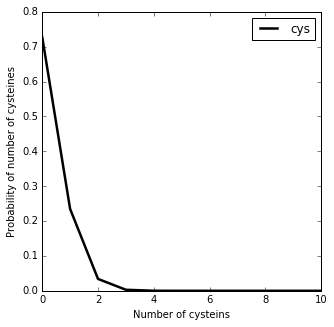

In [7]:
# plot the probabilities 
fig = plt.figure(0, (5, 5))
ax0 = fig.add_subplot(1,1,1)
ax0.plot(k, p_k, '-k', label='cys', linewidth=2.5)
ax0.set_ylabel("Probability of number of cysteines")
ax0.set_xlabel('Number of cysteins')
ax0.legend()